# Credit Card Customer Segmentation

This case requires to develop a customer segmentation to define marketing strategy.
The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

The dataset is taken from https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Following is the Data Dictionary for Credit Card dataset :
1. CUSTID : Identification of Credit Card holder
2. BALANCE : Balance amount left in their account to make purchases
3. BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES : Amount of purchases made from account
5. ONEOFFPURCHASES : Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES : Amount of purchase done in installment
7. CASHADVANCE : Cash in advance given by the user
8. PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
12. CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
13. PURCHASESTRX : Number of purchase transactions made
14. CREDITLIMIT : Limit of Credit Card for user
15. PAYMENTS : Amount of Payment done by user
16. MINIMUM_PAYMENTS : Minimum amount of payments made by user
17. PRCFULLPAYMENT : Percent of full payment paid by user
18. TENURE : Tenure of credit card service for user

## 1. Exploratory Data Analysis (EDA) and Data Pre-processing

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import cluster
from sklearn import mixture
from sklearn import metrics

In [3]:
data = pd.read_csv('CC GENERAL.csv')

df = data.copy(deep=True)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
print('Percentage of null for minimum payments : {0:.2f}%'.format(df['MINIMUM_PAYMENTS'].isna().sum()/len(df['MINIMUM_PAYMENTS'])*100))

Percentage of null for minimum payments : 3.50%


As the percentage of null data is low (3.5%), let's drop it from the dataframe.

In [7]:
df.dropna(inplace=True)

In [8]:
df.drop(['CUST_ID'], axis=1, inplace=True)

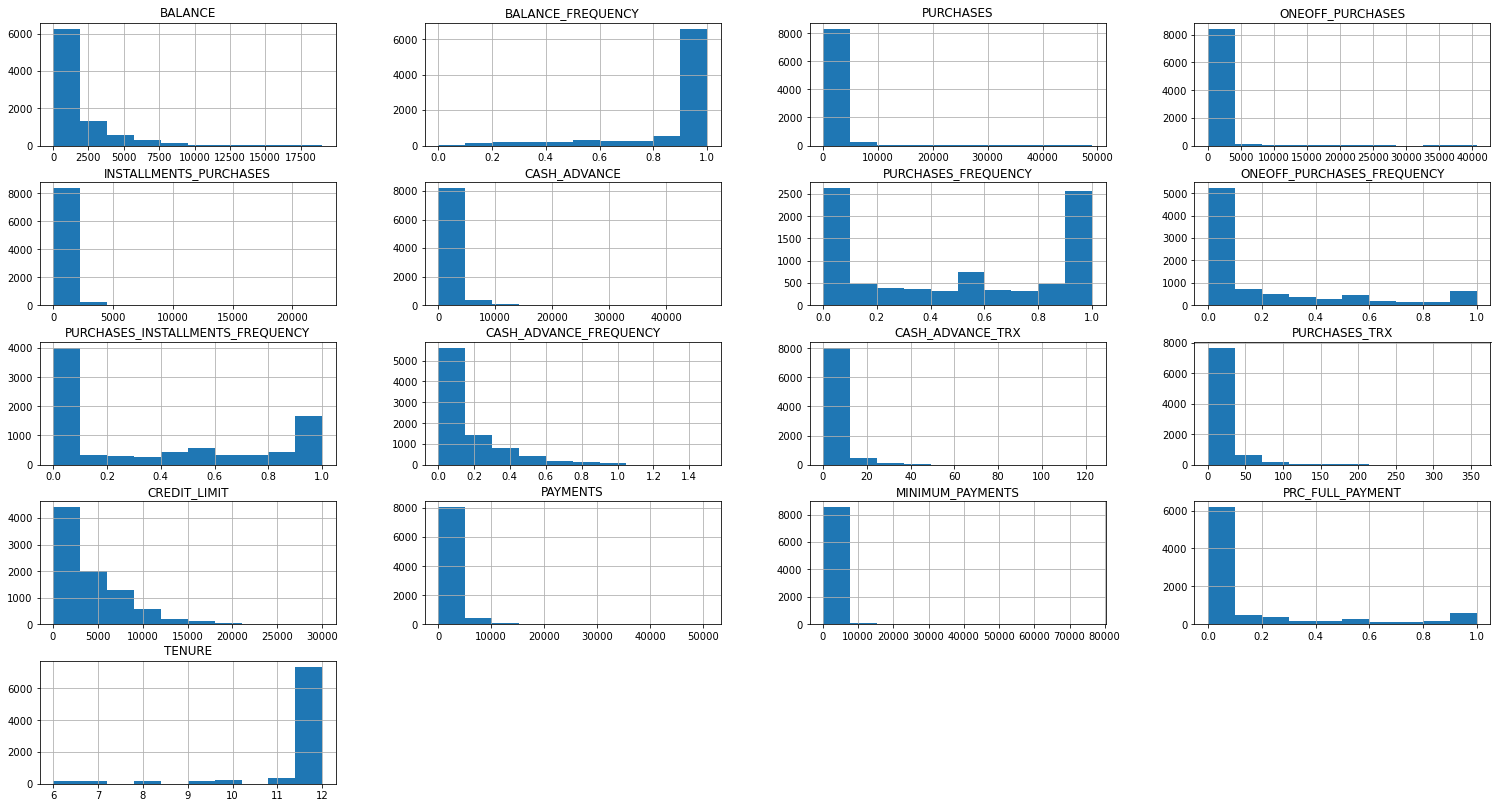

In [9]:
df.hist(figsize=(26, 14))
plt.show()

In [10]:
# standardised the data as clustering depends on the distance between variables
scaler = StandardScaler()
df_rescaled = scaler.fit_transform(df)

In [11]:
pd.DataFrame(df_rescaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-0.761342,-1.902089,-0.463563,-0.346751,-0.458839,-0.468655,-0.820769,-0.130790,-0.926522,-0.681953,-0.479437,-0.557339,-1.099224,-0.593143,-0.345988,-0.537727,-4.221800
8632,-0.750546,0.505405,-0.338865,-0.359160,-0.141436,-0.468655,1.256077,-0.686280,1.166912,-0.681953,-0.479437,-0.358760,-0.962575,-0.501396,-0.343706,1.150015,-4.221800
8633,-0.752977,-0.297095,-0.406572,-0.359160,-0.301402,-0.468655,0.840707,-0.686280,0.748227,-0.681953,-0.479437,-0.398476,-0.962575,-0.585367,-0.329572,0.306144,-4.221800
8634,-0.757721,-0.297095,-0.473208,-0.359160,-0.458839,-0.451422,-1.236139,-0.686280,-0.926522,0.144032,-0.190089,-0.597054,-1.099224,-0.595238,-0.340811,0.306144,-4.221800


## 2. Machine Learning Model Training

### 2.1 KMeans CLustering

In [11]:
# use pca to reduce the data dimensionality so that it can be visualised in 2D
pca = PCA(n_components = 2)
pca.fit(df_rescaled)
reduced = pca.transform(df_rescaled)

Text(0.5, 1.0, 'KMeans Spherical Check')

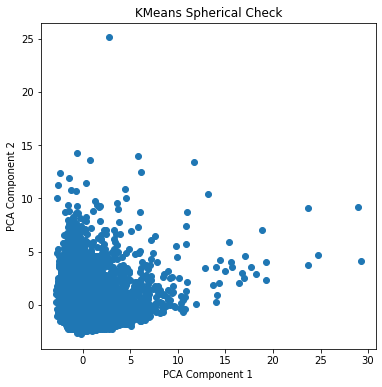

In [12]:
# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(reduced[:, 0], reduced[:, 1])

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Spherical Check')

As the data is still spherical in dimensional space, we can proceed to use KMeans method.

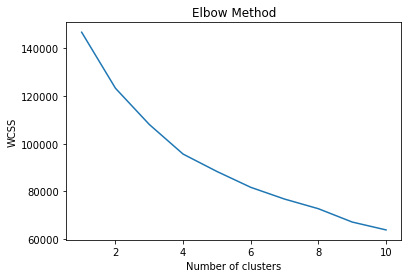

In [13]:
# use elbow method to determine the optimal no of clusters
wcss = []

for i in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_rescaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We use number of cluster = 4 as it is the elbow location where the wcss value start decreasing in a linear fashion.

In [14]:
kmeans = cluster.KMeans(n_clusters=4, max_iter=300, n_init=10, random_state=2022)
kmeans.fit(df_rescaled)
kmeans.labels_

array([2, 3, 0, ..., 0, 2, 2])

In [15]:
reduced_df = pd.concat([pd.DataFrame(reduced, columns=['PCA 1', 'PCA 2']), pd.DataFrame({'SEGMENT':kmeans.labels_})], axis=1)
reduced_df

,PCA 1,PCA 2,SEGMENT
0,-1.696395,-1.122584,2
1,-1.215681,2.435639,3
2,0.935853,-0.385204,0
3,-1.614638,-0.724586,2
4,0.223701,-0.783611,0
...,...,...,...
8631,-2.221637,-1.328410,2
8632,-0.362326,-2.032248,0
8633,-0.930026,-1.841235,0
8634,-2.356010,-0.718729,2


Text(0.5, 1.0, 'KMeans Spherical Check')

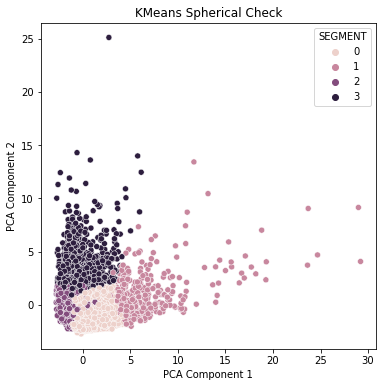

In [16]:
# visualize the cluster data on the space
plt.figure(figsize=(6, 6))
sns.scatterplot(data=reduced_df, x='PCA 1', y='PCA 2', hue='SEGMENT')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Spherical Check')

In [33]:
print("Silhoutte score for K-means : {:.2f}%".format(metrics.silhouette_score(df_rescaled, kmeans.labels_)))

Silhoutte score for K-means : 0.20%


In [17]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])   
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,913.099184,0.946169,1264.675431,611.072630,653.884203,218.409256,0.887404,0.302467,0.713691,0.043817,0.815910,22.511429,4254.075054,1373.189779,649.316887,0.274334,11.601036
1,3586.147809,0.986840,7816.070736,5194.559518,2623.034061,658.230083,0.944589,0.737344,0.786971,0.070831,2.098985,90.347716,9775.380711,7454.041676,2016.140976,0.291842,11.949239
2,1061.245064,0.818901,273.943703,210.942878,63.279848,606.661232,0.174488,0.087724,0.083122,0.119162,2.211038,2.997898,3259.159877,1013.575184,573.842255,0.084056,11.479106
3,4655.121148,0.969212,505.501029,319.814377,185.774602,4585.995163,0.290473,0.139730,0.187859,0.487255,14.448097,7.753460,7649.268638,3556.895507,2037.975309,0.035326,11.385813


Based on the center of the clusters, we can identify the characteristics of the customers in each segment:
1. First group: These customers have lowest cash advance and balance amount left in their account. These are careful customers with their spending
2. Second group: These customers have the highest purchases and one off purchase with highest purchases frequency. These customers are the most lucrative
3. Third group: These customer don't make installment purchases and lowest purchase frequency
4. Forth group: These customers use cash advance often

In [21]:
df_label = pd.concat([df.reset_index(drop=True), pd.DataFrame({'SEGMENT':kmeans.labels_})], axis=1)
df_label.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,SEGMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,2
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0


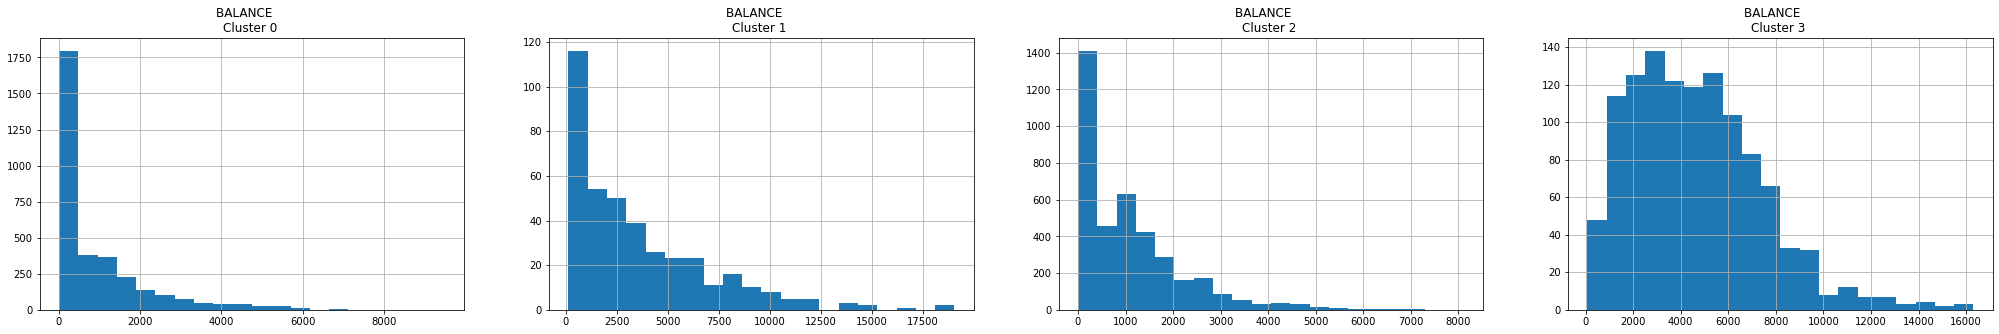

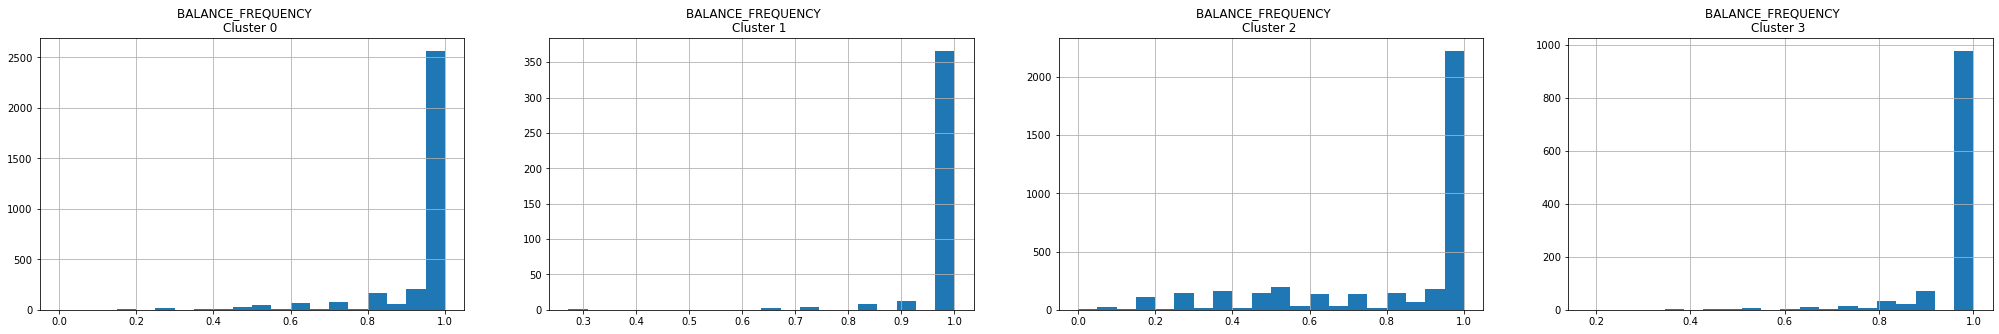

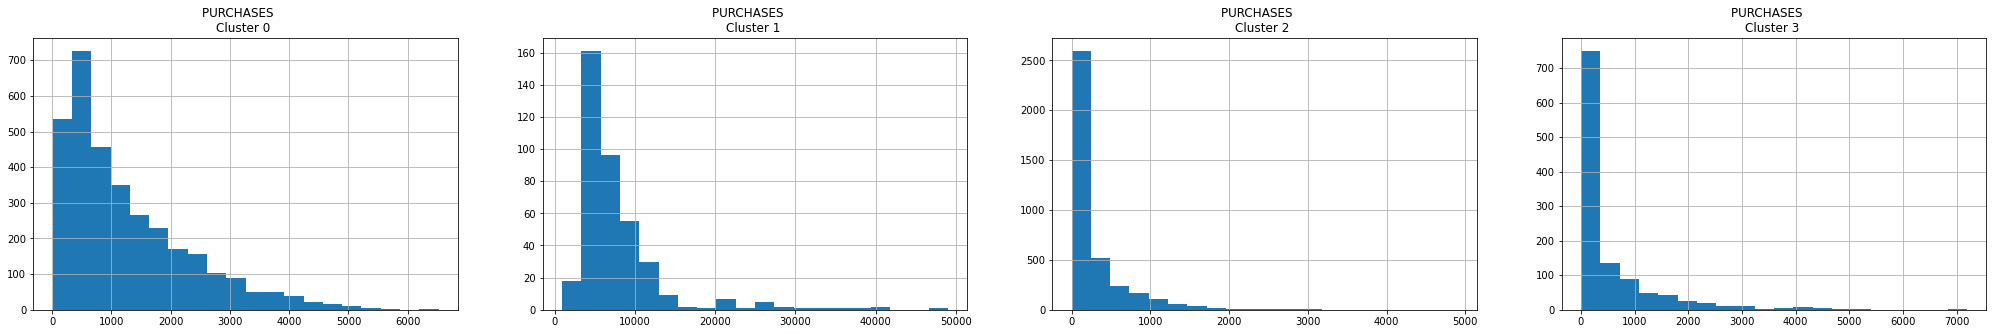

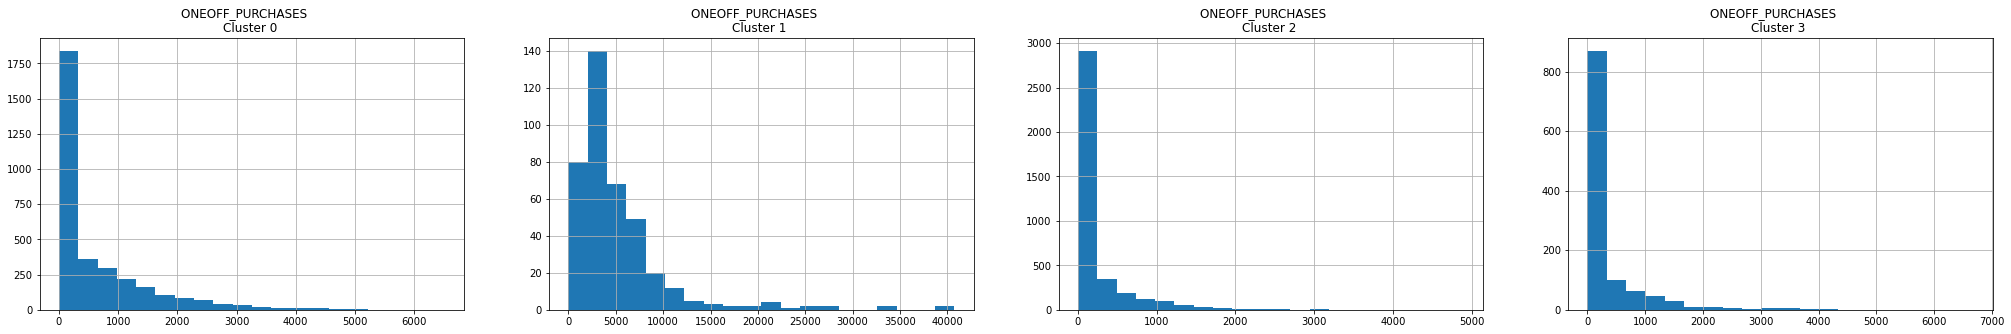

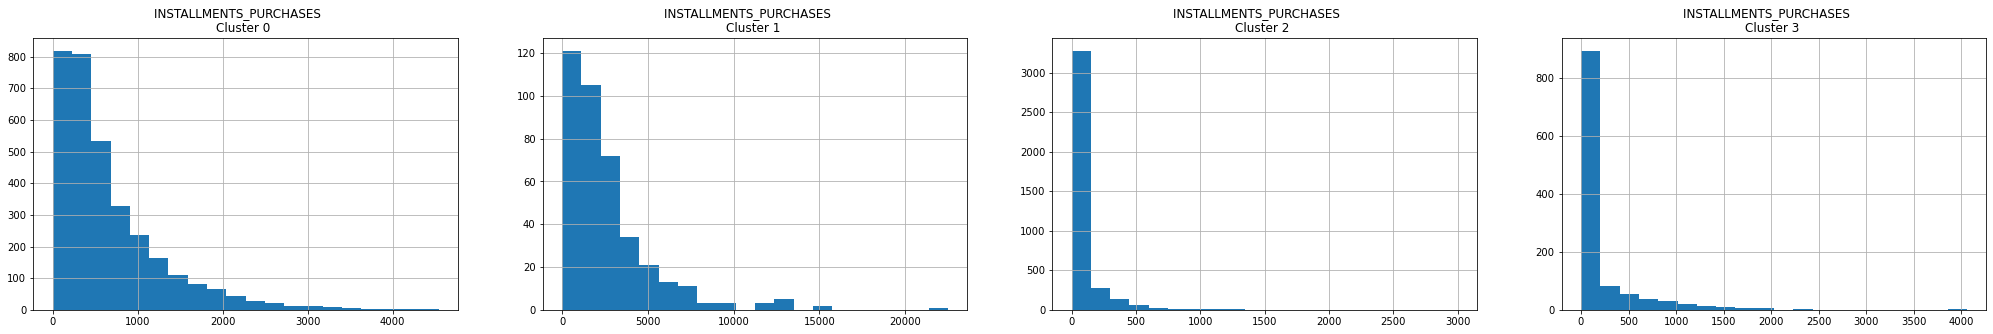

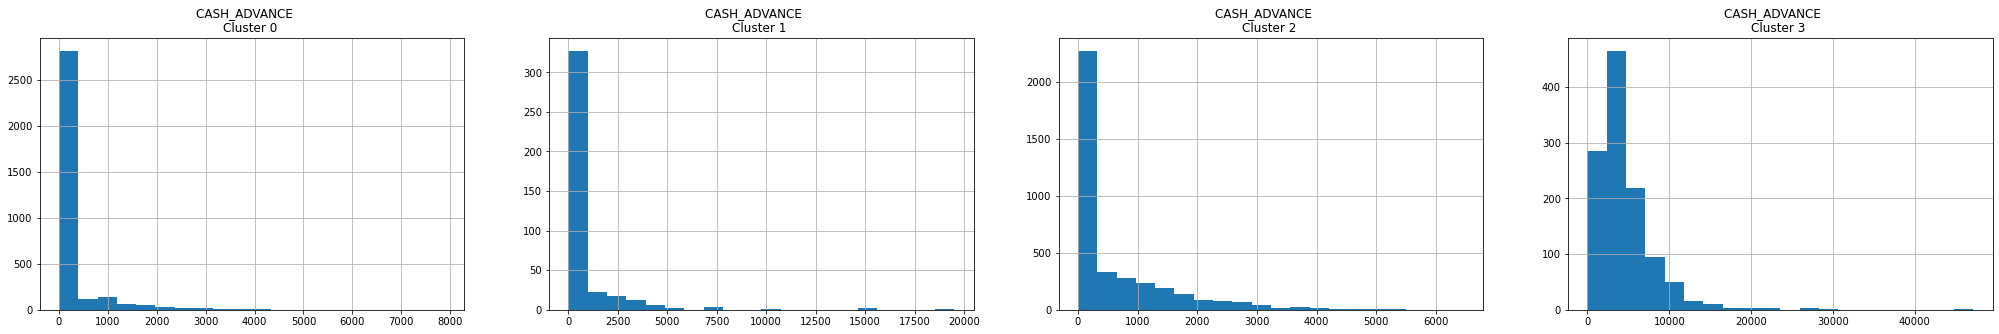

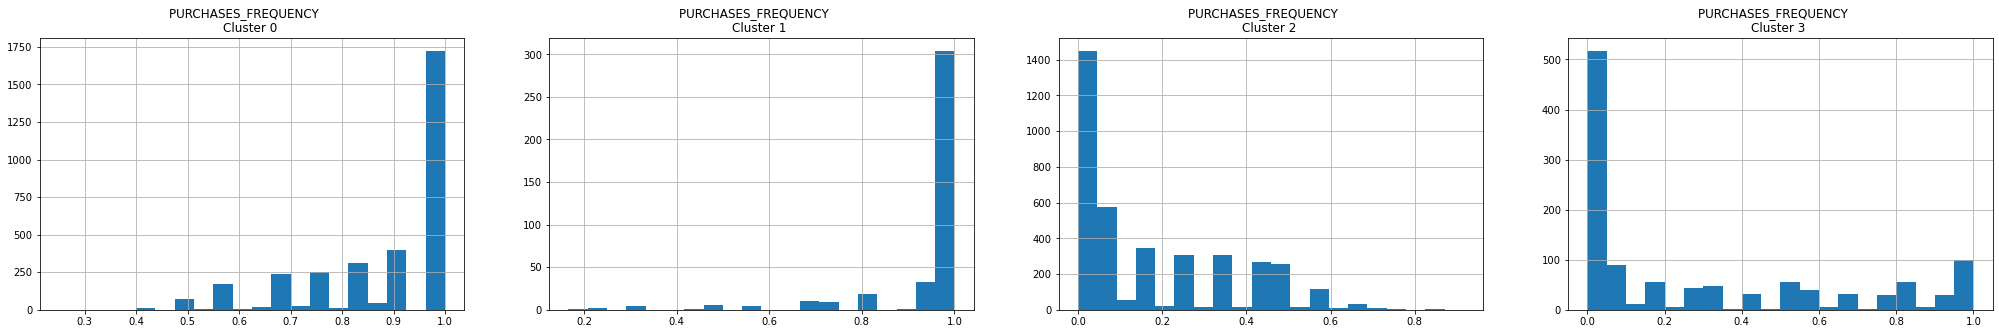

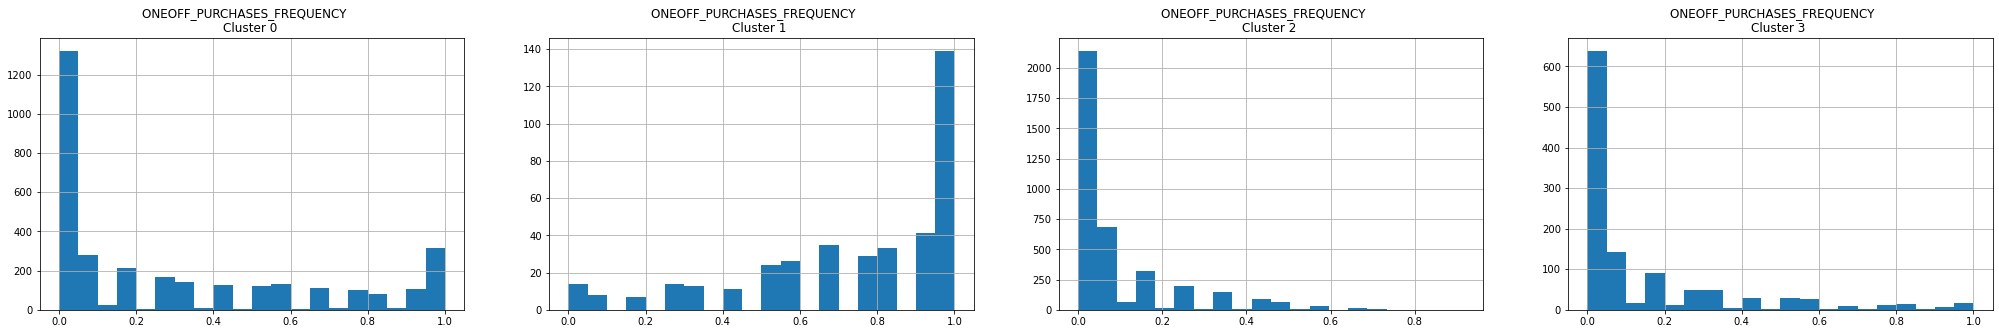

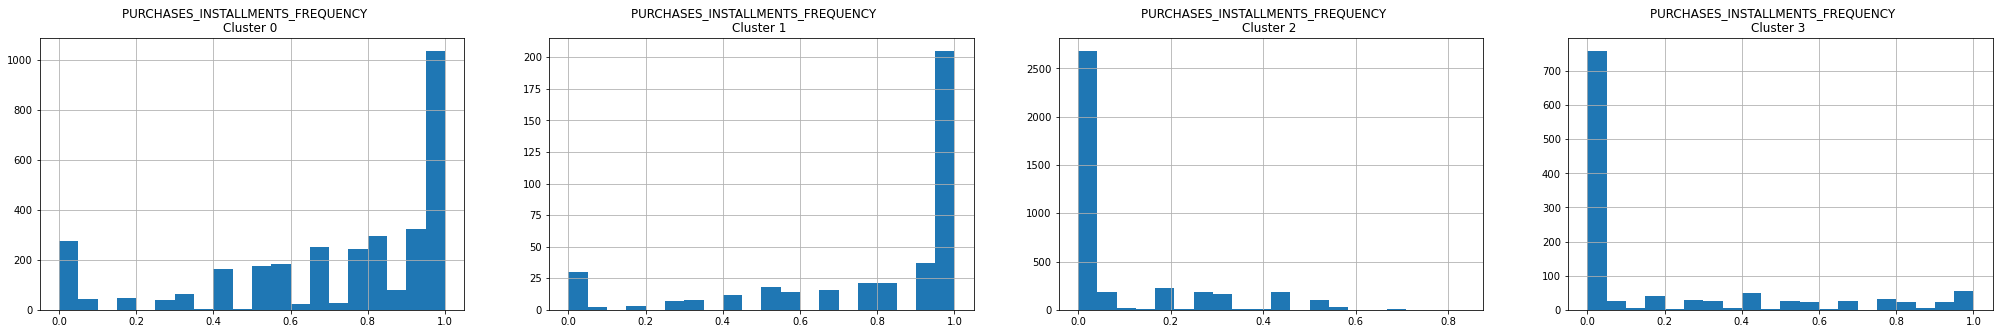

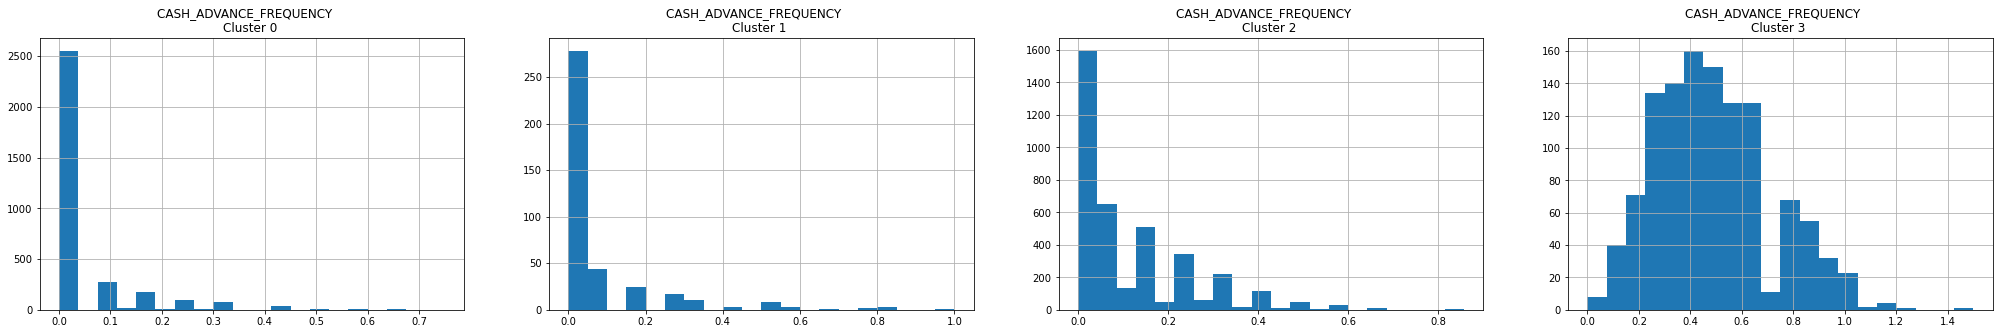

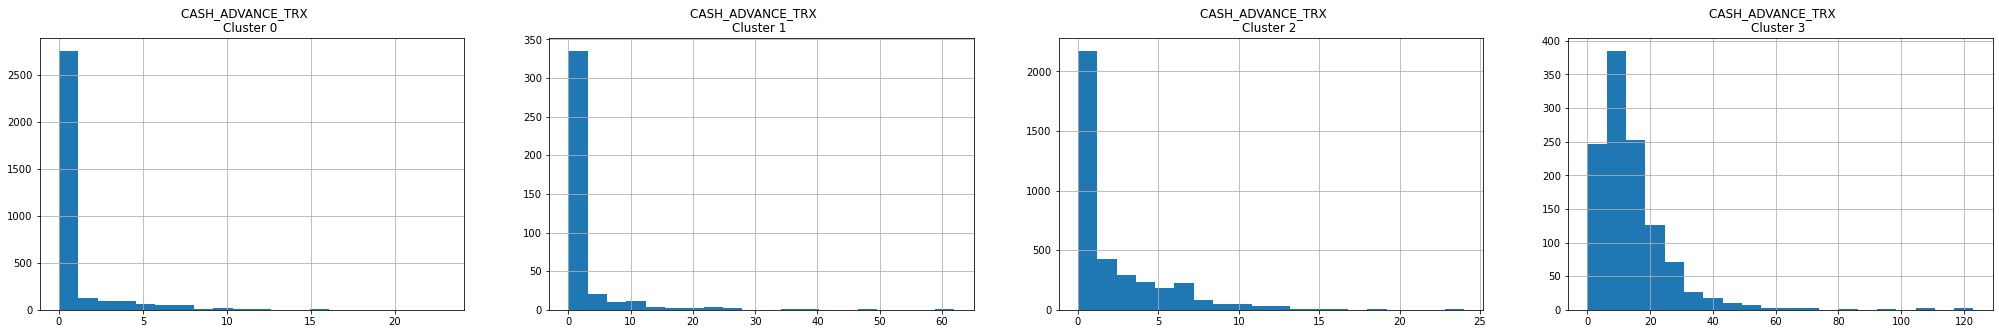

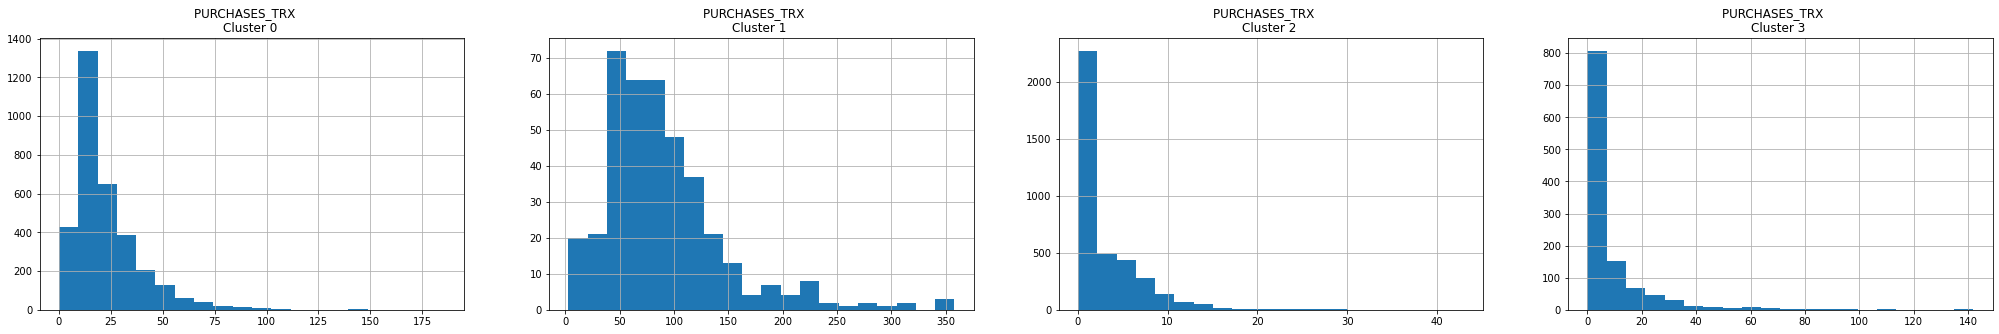

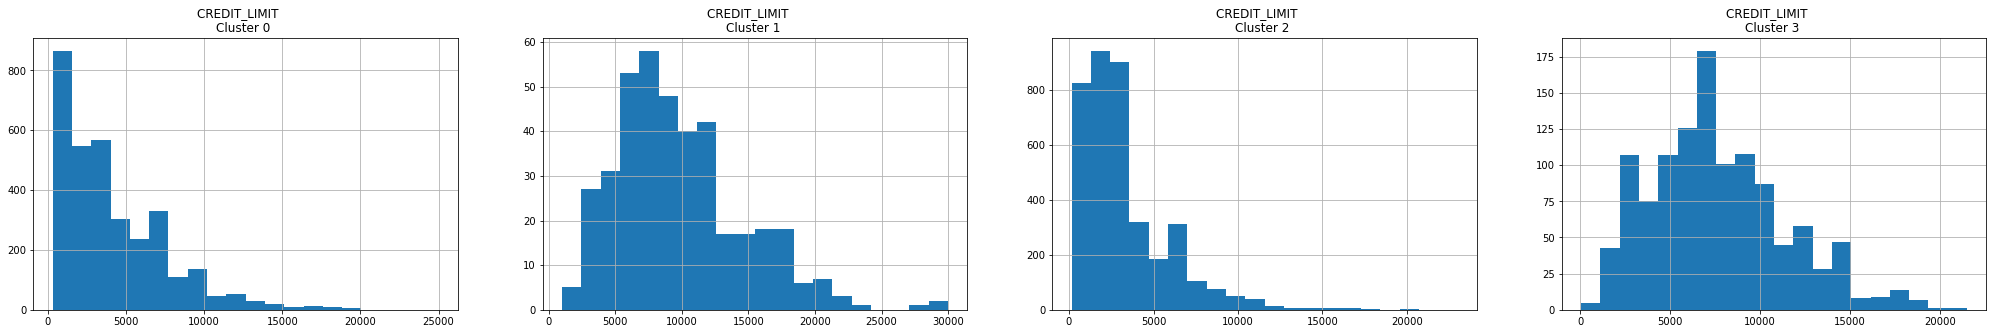

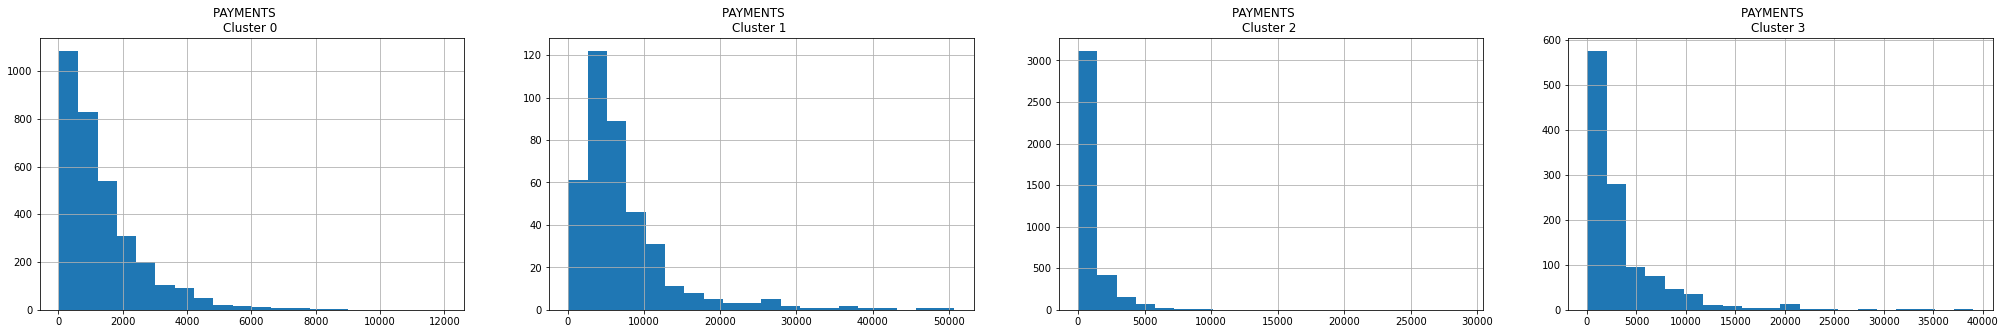

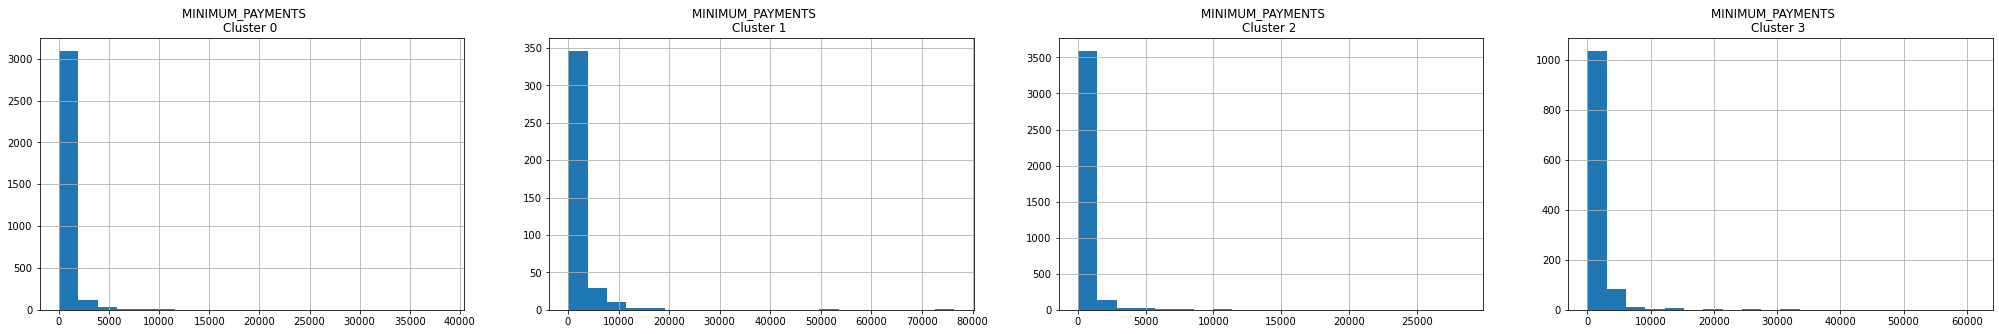

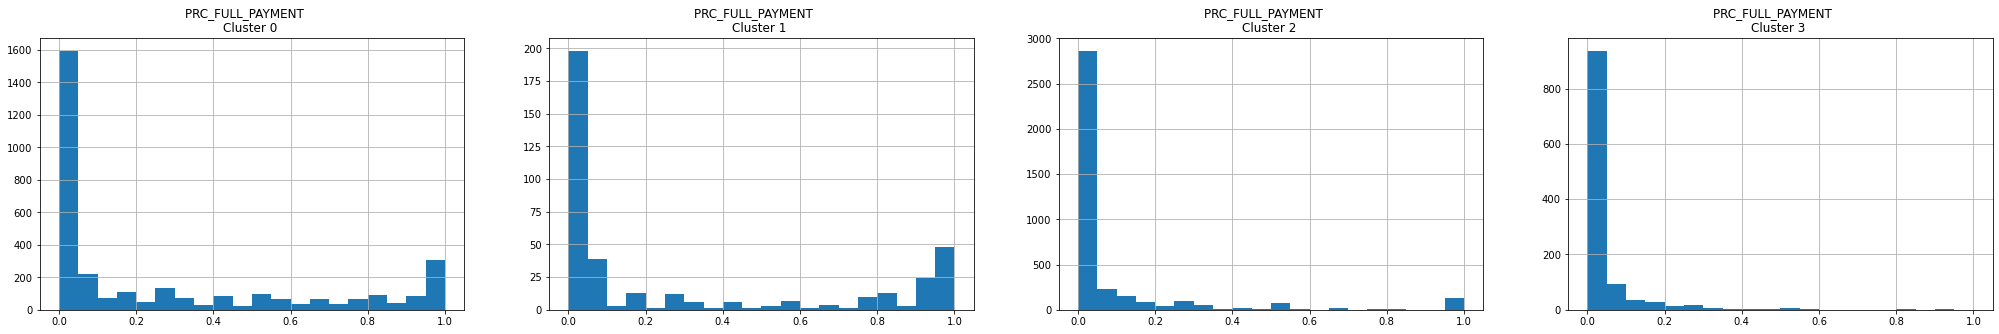

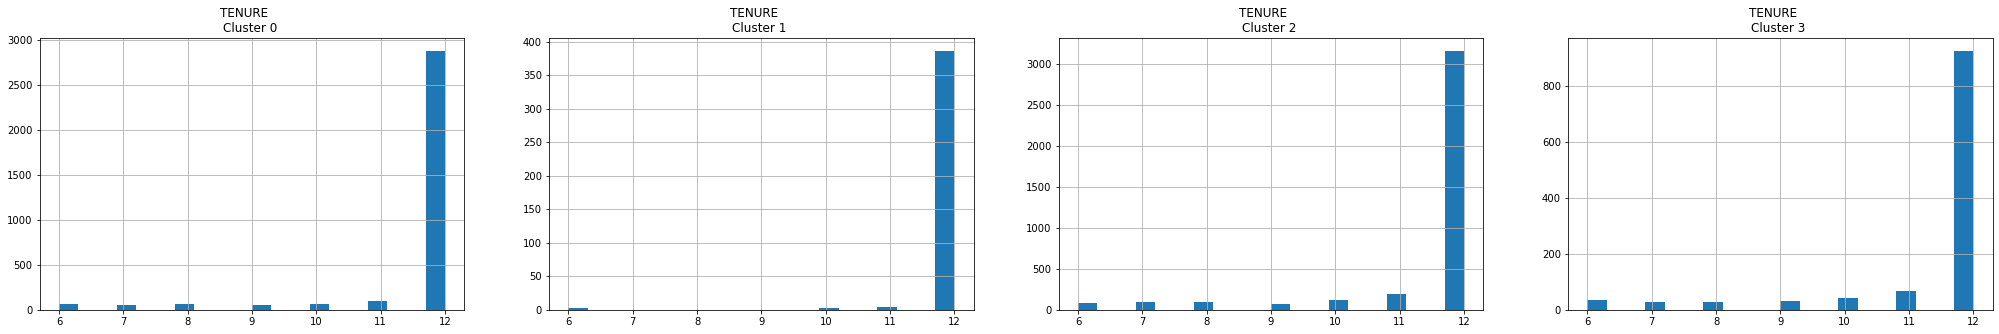

In [34]:
# plot the histogram of various segments' features
for i in df.columns:
    plt.figure(figsize = (35, 5))
    for j in range(4):
        plt.subplot(1,4,j+1)
        cluster = df_label[df_label['SEGMENT'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {} '.format(i,j))

plt.show()

### 2.2 Gaussian Mixture and Agglomerative Clustering

Let's try different types of clustering method i.e., Gaussian Mixture and Agglomerative Clustering methods and compare the result with KMeans.

In [39]:
gmm = mixture.GaussianMixture(n_components=4, random_state=2022)
gmm_labels = gmm.fit_predict(df_rescaled)
gmm_labels

array([1, 0, 3, ..., 1, 0, 2], dtype=int64)

In [41]:
print("Silhoutte score for GMM : {:.2f}%".format(metrics.silhouette_score(df_rescaled, gmm_labels)))

Silhoutte score for GMM : 0.08%


In [42]:
agglo = cluster.AgglomerativeClustering(n_clusters=4).fit(df_rescaled)
agglo.labels_

array([0, 2, 3, ..., 0, 0, 0], dtype=int64)

In [44]:
print("Silhoutte score for AgglomerativeClustering : {:.2f}%".format(metrics.silhouette_score(df_rescaled, agglo.labels_)))

Silhoutte score for AgglomerativeClustering : 0.16%


## 3. Conclusion

We use KMeans clustering as the model as it has highest silhoutte score for clustering of 0.2% which means it has better data compact within its cluster and far from other clusters.

By using elbow method, we derived the optimal number of clusters for the data which is 4.

Upon analyzing the 4 different types of customer segmentation of the credit card customers, these are the characteristics of each customers:
- First group: These customers have lowest cash advance and balance amount left in their account. These are careful customers with their spending
- Second group: These customers have the highest purchases and one off purchase with highest purchases frequency. These customers are the most lucrative
- Third group: These customer don't make installment purchases abd lowest purchase frequency
- Forth group: These customers use cash advance often